# Import the packages

In [2]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np

# 1. Basic exploration with panda

We compute the methods seen in the lecture 2 of the ML course.

In [3]:
filename = "household_power_consumption/0_smart_plugs_devices.csv"

data = pd.read_csv(filename)

#display the 10 first rows, for all the features (names of the columns)
#print(data.head(10))

#dimensions of the data
shape = data.shape
print(shape)

#Type of each attribute
data = pd.read_csv(filename)
types = data.dtypes
print(types)

#Descriptive statistics. describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute.
pd.set_option('display.precision', 2)
description = data.describe()
description

#Pearson's correlation coefficient to see the relationship between two attributes and how they may or may not influence each other
#pd.set_option('display.precision', 3)
#correlations = data.corr(method='pearson')
#print(correlations)

(42, 9)
id                      int64
first_ts               object
last_ts                object
available_duration    float64
plug_name              object
appliance_category     object
comment                object
files_names            object
power_max             float64
dtype: object


,id,available_duration,power_max
count,42.00,42.00,42.00
mean,204.40,29.40,1101.92
std,99.78,2.78,1048.11
min,29.00,12.73,16.00
25%,132.00,30.00,55.00
50%,224.00,30.00,1050.00
75%,289.75,30.00,1917.75
max,343.00,30.00,3267.00


# 2. Plots with matplotlib to better understand the data - Solar panel

We have a lot of different electricity-consuming objects (42 different), each are refered thanks to an id and for each device we get a file with the power consumed depending on the time.
I chose to plot the evolution of power consumed by the solar_panel_325.

In [44]:
filename_1 = "household_power_consumption/solar_panel_325.csv"

df_1 = pd.read_csv(filename_1, parse_dates=['timestamp'])
some_lines = df_1.iloc[0::1000]
selected_dates = some_lines['timestamp'][0::86]  # Dates you want to show in the legend
selected_dates

0         2021-04-20 10:08:23+00:00
86000     2021-04-21 10:01:43+00:00
172000    2021-04-22 09:55:03+00:00
258000    2021-04-23 09:48:23+00:00
344000    2021-04-24 09:41:43+00:00
430000    2021-04-25 09:35:03+00:00
516000    2021-04-26 09:28:23+00:00
602000    2021-04-27 09:21:43+00:00
688000    2021-04-28 09:15:03+00:00
774000    2021-04-29 09:08:23+00:00
860000    2021-04-30 09:01:43+00:00
946000    2021-05-01 08:55:03+00:00
1032000   2021-05-02 08:48:23+00:00
1118000   2021-05-03 08:41:43+00:00
1204000   2021-05-04 08:35:03+00:00
1290000   2021-05-05 08:28:23+00:00
1376000   2021-05-06 08:21:43+00:00
1462000   2021-05-07 08:15:03+00:00
1548000   2021-05-08 08:08:23+00:00
1634000   2021-05-09 08:01:43+00:00
1720000   2021-05-10 07:55:03+00:00
1806000   2021-05-11 07:48:23+00:00
1892000   2021-05-12 07:41:43+00:00
1978000   2021-05-13 07:35:03+00:00
2064000   2021-05-14 07:28:23+00:00
2150000   2021-05-15 07:21:43+00:00
2236000   2021-05-16 07:15:03+00:00
2322000   2021-05-17 07:08:2

0         2021-04-20 10:08:23+00:00
1000      2021-04-20 10:25:03+00:00
2000      2021-04-20 10:41:43+00:00
3000      2021-04-20 10:58:23+00:00
4000      2021-04-20 11:15:03+00:00
                     ...           
2588000   2021-05-20 09:01:43+00:00
2589000   2021-05-20 09:18:23+00:00
2590000   2021-05-20 09:35:03+00:00
2591000   2021-05-20 09:51:43+00:00
2592000   2021-05-20 10:08:23+00:00
Name: timestamp, Length: 2593, dtype: datetime64[ns, UTC]
0         2021-04-20 10:08:23+00:00
1296000   2021-05-05 10:08:23+00:00
2592000   2021-05-20 10:08:23+00:00
Name: timestamp, dtype: datetime64[ns, UTC]


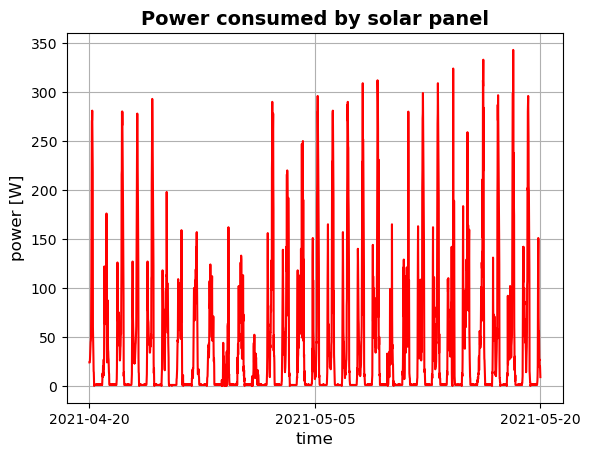

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
filename_1 = "household_power_consumption/solar_panel_325.csv"
df_1 = pd.read_csv(filename_1, parse_dates=['timestamp'])

# Select some lines
some_lines = df_1.iloc[0::1000]
print(some_lines['timestamp'])

# Plot data
plt.grid()
plt.title('Power consumed by solar panel', fontsize=14, fontweight='bold', color='black')
plt.ylabel('power [W]', fontsize=12)
plt.xlabel('time', fontsize=12)
plt.plot(some_lines['timestamp'], some_lines['power'], 'r')

# Select dates for legend
#selected_dates = some_lines['timestamp'][0::258]  # Dates you want to show in the legend
selected_dates = some_lines['timestamp'][0::1296]  # Dates you want to show in the legend
print(selected_dates)

# Set x-axis ticks to selected dates
plt.xticks(selected_dates, rotation=0)

# Show the plot
plt.show()

#matplotlib.save


Plot one month, 30 min intervals

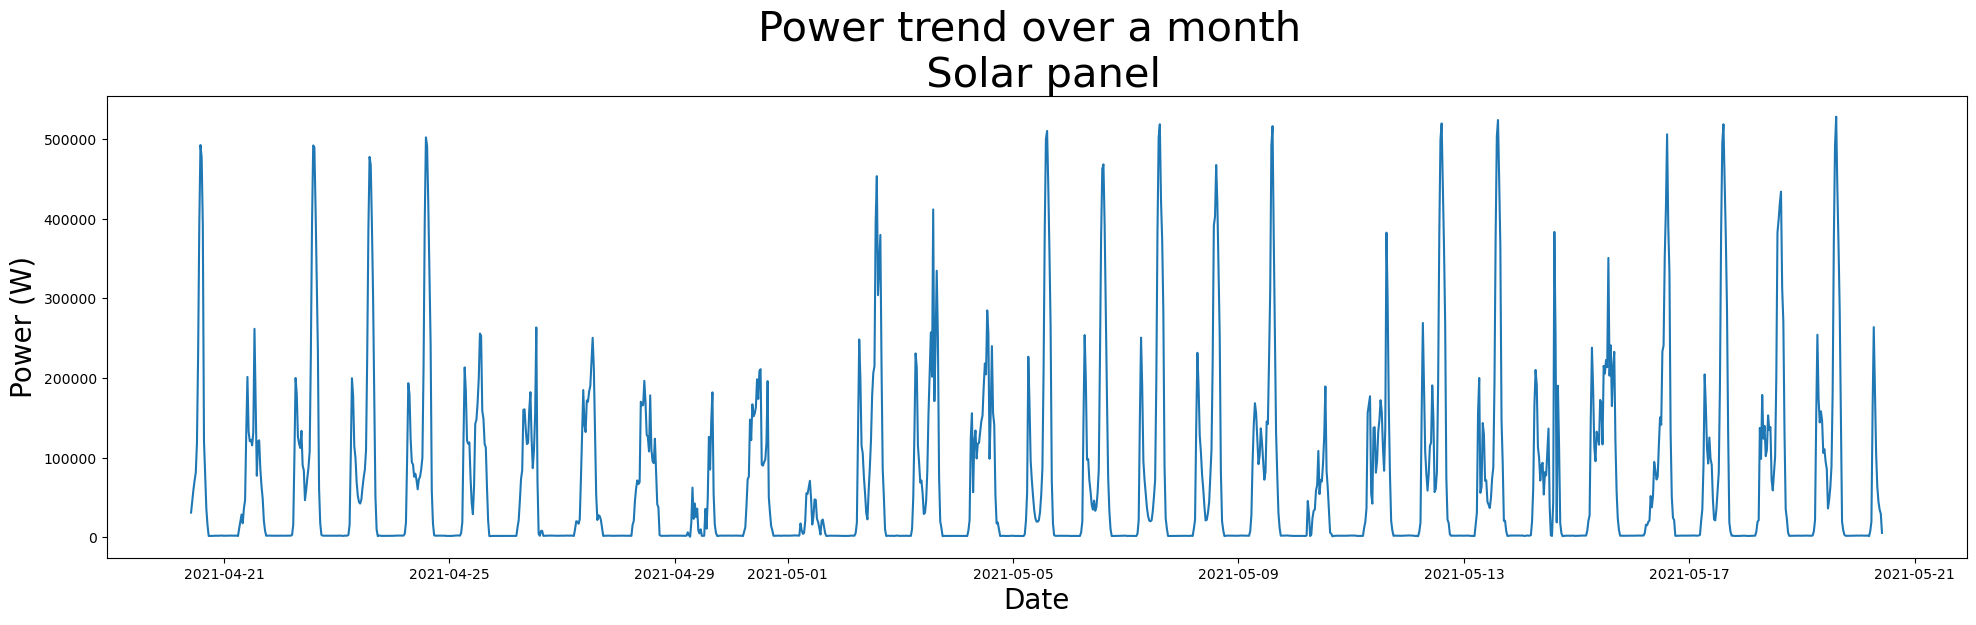

In [46]:
mseries = df_1.resample('30t', on='timestamp').power.sum()

df1 = pd.DataFrame({'timestamp': mseries.index, 'power': mseries.values})

plt.figure(figsize=(24, 6))
plt.plot(df1['timestamp'], df1['power'])
plt.title("Power trend over a month \n Solar panel", fontsize = 30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Power (W)', fontsize = 20)
plt.legend
plt.show()

Plot one day

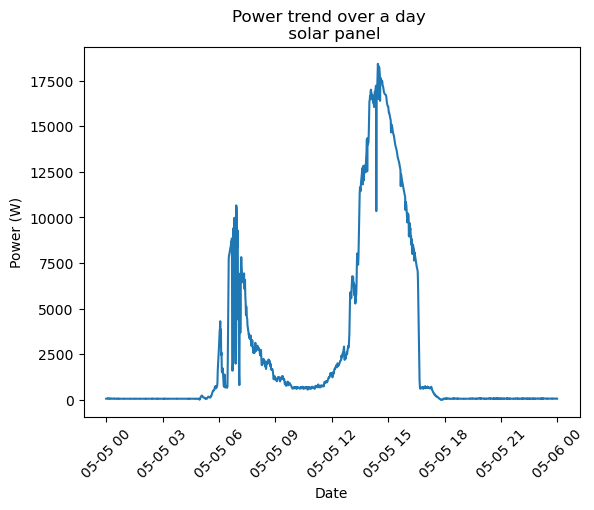

In [47]:
one_day_df_1 = df_1.loc[(df_1['timestamp'] < '2021-05-06') & (df_1['timestamp'] >= '2021-05-05')]

mseries = one_day_df_1.resample('1t', on='timestamp').power.sum()

plt.plot(mseries)
plt.title("Power trend over a day \n solar panel")
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Power (W)')
plt.show()

During this day the solar panel only works during the day (not surprising). One question : is it the power produced or the power consumed ?

# 3- Processing of the data for another device : washing machine 32

Let's take a look at another device.

1374.4522222222222


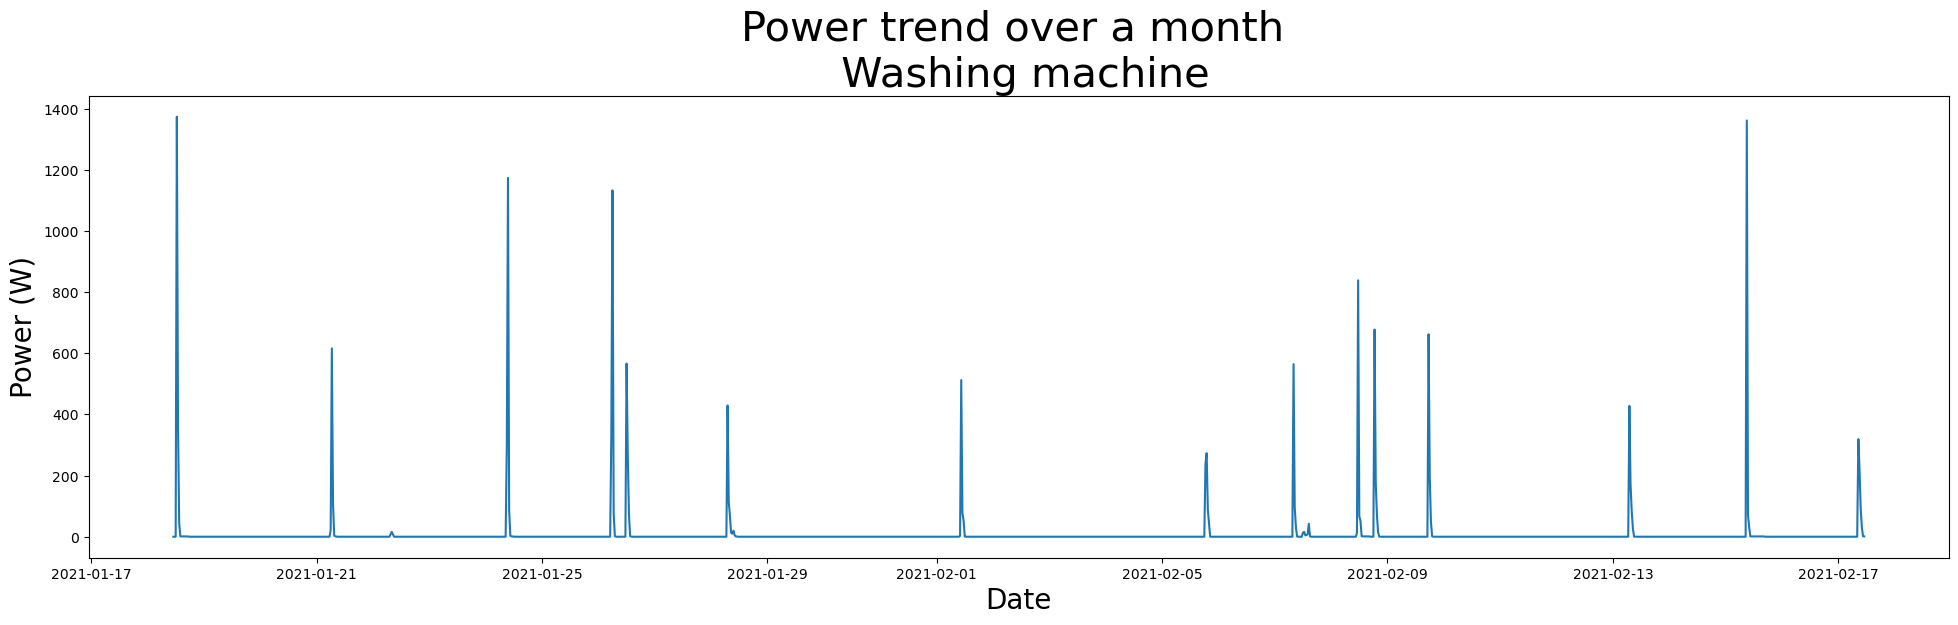

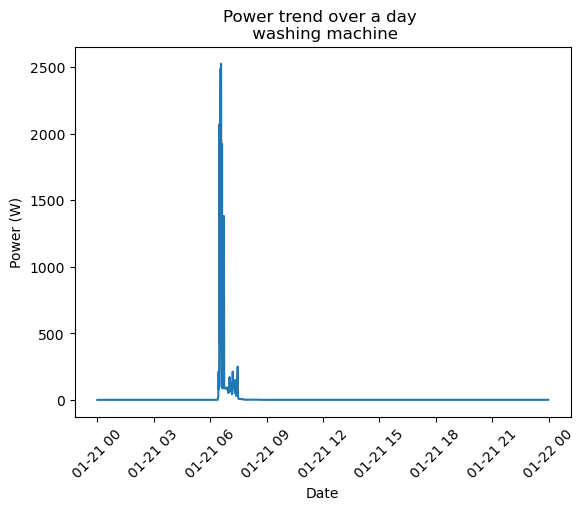

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#Plot one month, 30min time stamp

filename_2 = "household_power_consumption/washing_machine_32.csv"
df_2 = pd.read_csv(filename_2, parse_dates=['timestamp'])

mseries = df_2.resample('30t', on='timestamp').power.mean()

df2 = pd.DataFrame({'timestamp': mseries.index, 'power': mseries.values})
print(max(df2['power']))

plt.figure(figsize=(24, 6))
plt.plot(df2['timestamp'], df2['power'])
plt.title("Power trend over a month \n Washing machine", fontsize = 30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Power (W)', fontsize = 20)
plt.legend
plt.show()



#plot one day, 1 min time-stamp

one_day_df_2 = df_2.loc[(df_2['timestamp'] < '2021-01-22') & (df_2['timestamp'] >= '2021-01-21')]
#print(one_day_df_2)

mseries = one_day_df_2.resample('1t', on='timestamp').power.mean()

plt.plot(mseries)
plt.title("Power trend over a day \n washing machine")
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Power (W)')
plt.show()
